In [1]:
!pip install ultralytics

!pip install roboflow

import cv2
import numpy as np
from matplotlib import pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


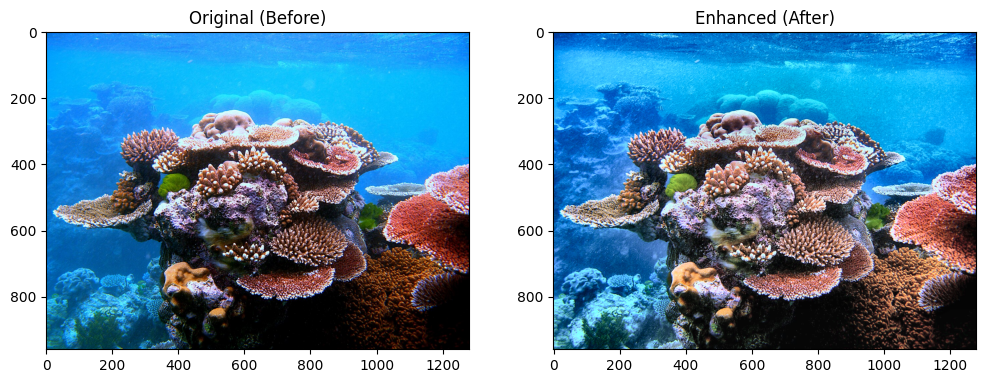

In [2]:

img_path = 'Coral.jpg'
img = cv2.imread(img_path)

if img is None:
    print("خطأ: لم يتم العثور على الصورة. تأكد من رفعها في القائمة اليسرى.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1); plt.imshow(img); plt.title('Original (Before)')
    plt.subplot(1, 2, 2); plt.imshow(enhanced_img); plt.title('Enhanced (After)')
    plt.show()

In [3]:

from roboflow import Roboflow
rf = Roboflow(api_key="1cR10H7ucqLeQEzemBkV")
project = rf.workspace("ai-idj2q").project("coral-reef-health-identifier-kytm1")
version = project.version(1)
dataset = version.download("yolov8")

# 3. بدء عملية التدريب (هنا يبدأ الذكاء الاصطناعي بالتعلم)
from ultralytics import YOLO

# سنستخدم الموديل الصغير (n) ليكون سريعاً ومناسباً للبداية
model = YOLO('yolov8n.pt')

# التدريب لمدة 25 دورة (Epochs) كبداية جيدة جداً
model.train(data=f'{dataset.location}/data.yaml', epochs=25, imgsz=512, plots=True)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Coral-Reef-Health-Identifier-1 in yolov8:: 100%|██████████| 8950/8950 [00:01<00:00, 8068.74it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Coral-Reef-Health-Identifier-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d5ab84e1760>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804


image 1/1 /content/Test_coral.jpg: 288x512 3 Healthys, 41.3ms
Speed: 1.1ms preprocess, 41.3ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 512)


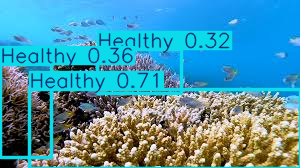

In [5]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# 1. تحميل النموذج الذي تدرب (أفضل نسخة)
model = YOLO('/content/runs/detect/train/weights/best.pt')

# 2. تشغيل التنبؤ على الصورة الجديدة
results = model.predict(source='Test_coral.jpg', conf=0.25)

# 3. عرض النتيجة
res_plotted = results[0].plot()
cv2_imshow(res_plotted)

In [7]:
import os
from ultralytics import YOLO

# 1. إعادة تعريف المسارات (للتأكد من عدم حدوث NameError)
# ملاحظة: تأكدي من اسم المجلد في القائمة اليسرى، إذا كان مختلفاً غيريه هنا
dataset_path = '/content/Coral-Reef-Health-Identifier-1'
yaml_path = os.path.join(dataset_path, 'data.yaml')

# 2. تحميل الموديل المتوسط (YOLOv8 Medium) - أقوى من السابق
model = YOLO('yolov8m.pt')

# 3. بدء التدريب المطور
# زدنا الـ Epochs لـ 50 وحجم الصورة لـ 640 لرفع الدقة
results = model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,
    device=0, # استخدام الـ GPU
    name='coral_enhanced_model' # تسمية المجلد لتمييز النتائج
)

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Coral-Reef-Health-Identifier-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=coral_enhanced_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=T

In [9]:
import zipfile
import os

# 1. تحديد مسار ملف الـ zip الذي قمتِ بحفظه
zip_path = '/content/Coral_Enhanced_Test_Set.zip'
# 2. المجلد الذي سيقرأ منه الموديل
inference_input_dir = '/content/final_enhanced_test_images'

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(inference_input_dir)
    print(f"✅ جاهزون! تم فك ضغط {len(os.listdir(inference_input_dir))} صورة محسنة.")
else:
    print(" لم نجد ملف الـ zip، تأكدي من رفعه أو مساره.")

✅ جاهزون! تم فك ضغط 31 صورة محسنة.


In [12]:
from ultralytics import YOLO

# تحميل أفضل وزن ناتج عن التدريب (Medium Model)
model = YOLO('/content/runs/detect/train/weights/best.pt')

# تشغيل التنبؤ
results = model.predict(
    source='/content/final_enhanced_test_images',
    conf=0.30, # جربي 0.30 كبداية لموازنة الدقة
    save=True,
    project='RedSeaLens_Results', # اسم المجلد النهائي
    name='final_test'
)


image 1/32 /content/final_enhanced_test_images/10-2-_jpg.rf.2a82d5720f30d4092831a7493b349f27.jpg: 512x512 1 Bleached, 1 Healthy, 8.4ms
image 2/32 /content/final_enhanced_test_images/21.jpg: 512x512 1 Healthy, 5.8ms
image 3/32 /content/final_enhanced_test_images/22.jpg: 512x512 1 Bleached, 5.9ms
image 4/32 /content/final_enhanced_test_images/800.jpg: 384x512 6 Healthys, 6.5ms
image 5/32 /content/final_enhanced_test_images/B.jpg: 352x512 1 Bleached, 37.9ms
image 6/32 /content/final_enhanced_test_images/photo_10_2026-01-29_02-07-12.jpg: 512x352 4 Healthys, 6.3ms
image 7/32 /content/final_enhanced_test_images/photo_11_2026-01-29_02-07-12.jpg: 512x384 1 Healthy, 6.3ms
image 8/32 /content/final_enhanced_test_images/photo_12_2026-01-29_02-07-12.jpg: 512x320 1 Healthy, 6.4ms
image 9/32 /content/final_enhanced_test_images/photo_13_2026-01-29_02-07-12.jpg: 512x320 4 Healthys, 7.1ms
image 10/32 /content/final_enhanced_test_images/photo_14_2026-01-29_02-07-12.jpg: 512x320 1 Bleached, 2 Healthys, 

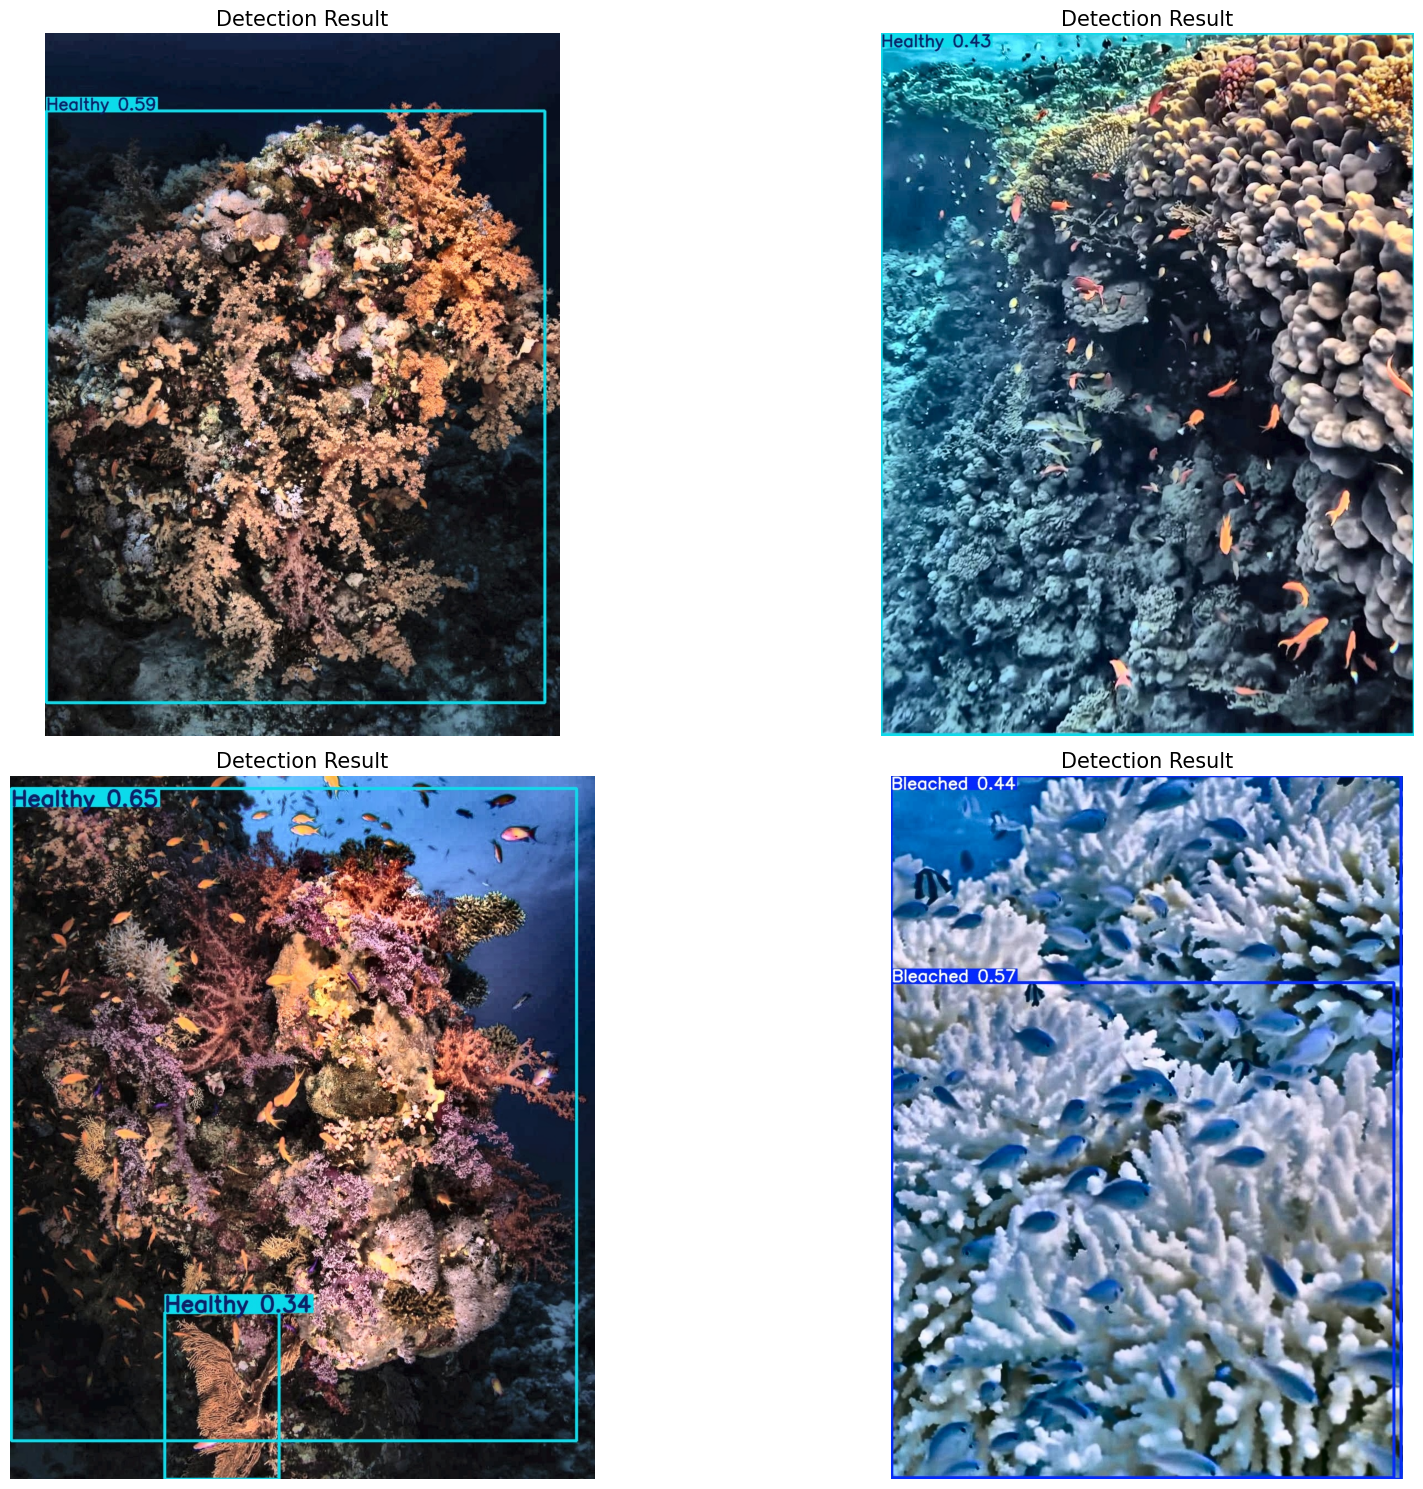

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# المسار الصحيح كما ظهر في مخرجات الموديل لديكِ
result_path = '/content/runs/detect/RedSeaLens_Results/final_test3'

if os.path.exists(result_path):
    result_files = [f for f in os.listdir(result_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:4]

    if len(result_files) > 0:
        fig, axes = plt.subplots(2, 2, figsize=(20, 15))
        for i, ax in enumerate(axes.flat):
            if i < len(result_files):
                img = mpimg.imread(os.path.join(result_path, result_files[i]))
                ax.imshow(img)
                ax.set_title(f"Detection Result",fontsize=15)
                ax.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ المجلد موجود ولكن لا يحتوي على صور.")
else:
    print(f"❌ المسار غير صحيح، تأكدي من مكان حفظ النتائج في قائمة الملفات.")

In [8]:
!pip install gradio

In [ ]:
import gradio as gr
from ultralytics import YOLO
import numpy as np
from PIL import Image

# 1. تحميل الموديل (استخدمي الموديل المتاح حالياً)
model = YOLO('/content/runs/detect/train/weights/best.pt')

def predict_coral(img):
    # تشغيل التنبؤ
    results = model.predict(source=img, conf=0.25)

    # رسم النتائج على الصورة
    res_plotted = results[0].plot()

    # تحويل النتيجة لصورة قابلة للعرض
    return Image.fromarray(res_plotted[:, :, ::-1]) # تصحيح ألوان BGR لـ RGB

# 2. تصميم واجهة المستخدم
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 🪸 RedSea-Lens Interface")
    gr.Markdown("Upload an underwater image to detect coral health (Healthy vs. Bleached).")

    with gr.Row():
        input_img = gr.Image(type="pil", label="Input Coral Image")
        output_img = gr.Image(type="pil", label="Detection Result")

    btn = gr.Button("Analyze Reef")
    btn.click(fn=predict_coral, inputs=input_img, outputs=output_img)

# 3. تشغيل الواجهة
demo.launch(share=True)